In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dotenv import load_dotenv
load_dotenv();

In [3]:
import os
import numpy as np
import pandas as pd

In [8]:
import src.features.build_features as FeaturesManager

In [9]:
seasons_year = [2015, 2016, 2017, 2018]
df = FeaturesManager.build_features(seasons_year)

  0%|          | 0/1230 [00:00<?, ?it/s]

  0%|          | 0/1229 [00:00<?, ?it/s]

C:\Users\anniw\anaconda3\envs\ift6758\lib\site-packages\numpy\linalg\linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
C:\Users\anniw\IFT6758-A2022-G08\src\features\build_features.py:79: RuntimeWarning: divide by zero encountered in double_scalars
  result = a/b
C:\Users\anniw\IFT6758-A2022-G08\src\features\build_features.py:79: RuntimeWarning: invalid value encountered in double_scalars
  result = a/b


In [10]:
df.head()

,Game ID,Event Index,Period,Team,Type,Shot Type,Shooter,Goalie,Strength,X,...,Last event st_Y,Shot distance,Shot angle,Is Goal,Is Empty,Game seconds,Last event angle,Rebound,Change in Shot Angle,Speed From Previous Event
0,2015020001,24,1,Montréal Canadiens (MTL),GOAL,Wrist Shot,Max Pacioretty,Jonathan Bernier,Even,63.0,...,-39.0,37.483330,-46.080924,1,0,189,-18.434949,False,0.000000,3.824492
1,2015020001,123,2,Toronto Maple Leafs (TOR),GOAL,Deflected,James van Riemsdyk,Carey Price,Power Play,-73.0,...,-18.0,162.003086,-0.353673,1,0,1219,-5.648247,False,0.000000,4.374802
2,2015020001,288,3,Montréal Canadiens (MTL),GOAL,Snap Shot,Alex Galchenyuk,Jonathan Bernier,Even,67.0,...,13.0,22.000000,0.000000,1,0,3122,14.574216,True,14.574216,15.435349
3,2015020001,329,3,Montréal Canadiens (MTL),GOAL,Wrist Shot,Max Pacioretty,Brian Flynn,Even,52.0,...,-22.0,37.215588,6.170175,1,1,3569,-7.926927,False,0.000000,15.470234
4,2015020001,7,1,Toronto Maple Leafs (TOR),SHOT,Wrist Shot,Brad Boyes,Carey Price,NaN,-55.0,...,34.0,34.525353,-10.007980,0,0,51,10.525108,False,0.000000,14.025066


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305860 entries, 0 to 305859
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Game ID                    305860 non-null  object 
 1   Event Index                305860 non-null  object 
 2   Period                     305860 non-null  object 
 3   Team                       305860 non-null  object 
 4   Type                       305860 non-null  object 
 5   Shot Type                  305827 non-null  object 
 6   Shooter                    305860 non-null  object 
 7   Goalie                     305860 non-null  object 
 8   Strength                   28689 non-null   object 
 9   X                          305860 non-null  object 
 10  Y                          305860 non-null  object 
 11  Last event type            305860 non-null  object 
 12  Last event X               302885 non-null  object 
 13  Last event Y               30

In [12]:
df['Shot distance'].max()

189.6549498431296

In [13]:
df['Shot distance'].min()

0.0

In [14]:
df['Shot angle'].max()

180.0

In [15]:
df['Shot angle'].min()

-161.565051177078

In [16]:
distance_bins = list(range(0, 195, 5))
angle_bins = list(range(0, 185, 5)) # All but the last (righthand-most) bin is half-open in Numpy

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0.5, 1.0, 'Goals')

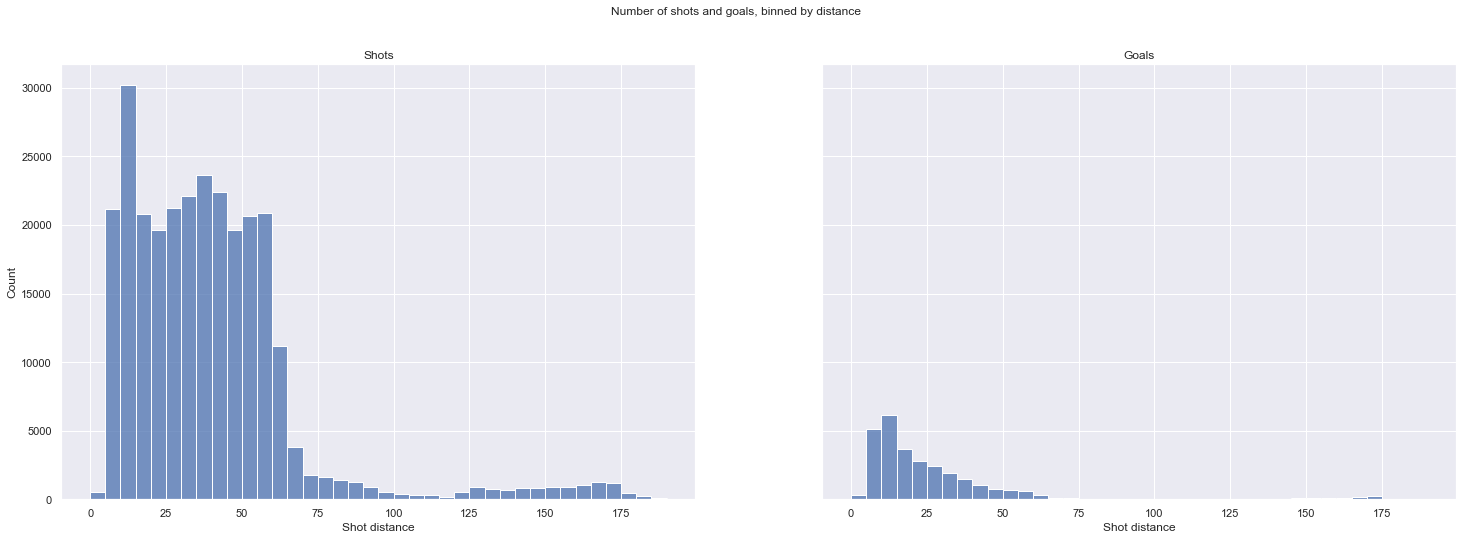

In [18]:
# Q1 - Hist1
fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Number of shots and goals, binned by distance')

sns.histplot(ax=axes[0], data=df, x=df[df['Is Goal'] == 0]["Shot distance"], bins=distance_bins)
axes[0].set_title('Shots')

sns.histplot(ax=axes[1], data=df, x=df[df['Is Goal'] == 1]["Shot distance"], bins=distance_bins)
axes[1].set_title('Goals')

Text(0.5, 1.0, 'Goals')

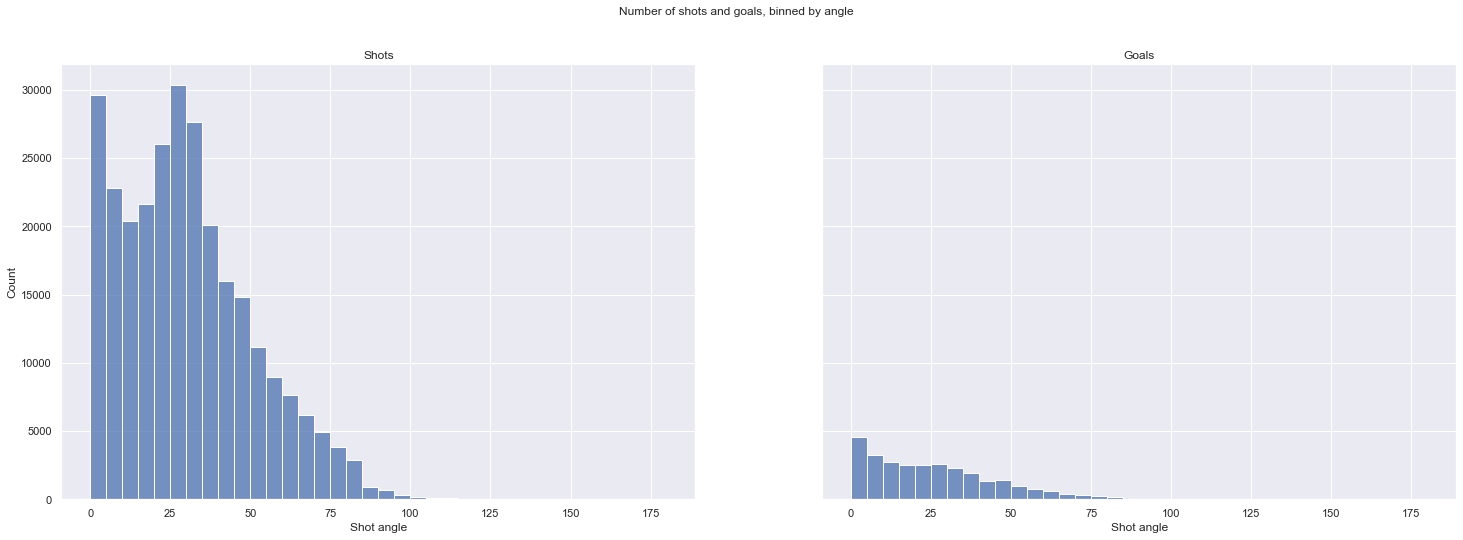

In [19]:
# Q1 - Hist2
fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Number of shots and goals, binned by angle')

sns.histplot(ax=axes[0], data=df, x=df[df['Is Goal'] == 0]["Shot angle"].abs(), bins=angle_bins)
axes[0].set_title('Shots')

sns.histplot(ax=axes[1], data=df, x=df[df['Is Goal'] == 1]["Shot angle"].abs(), bins=angle_bins)
axes[1].set_title('Goals')

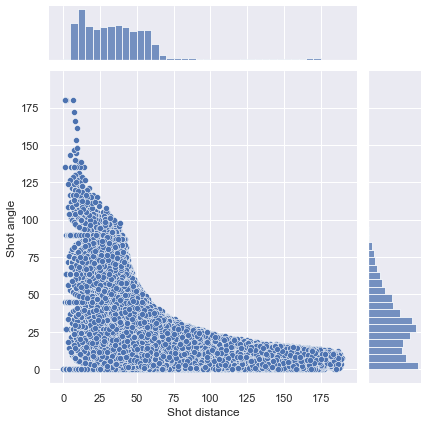

In [20]:
# Q1 - Hist3
sns.jointplot(data=df, x=df["Shot distance"], y=df["Shot angle"].abs(), marginal_kws=dict(bins=distance_bins)) # I took the absolute value

In [21]:
# Q2
distance_bins_2 = list(range(0, 195, 10))
angle_bins_2 = list(range(0, 185, 10))
df['Angle Bins'] = pd.cut(df['Shot angle'].abs(), bins=angle_bins_2, include_lowest=True)
df['Distance Bins'] = pd.cut(df['Shot distance'], bins=distance_bins_2, include_lowest=True)

In [22]:
df_angle = pd.pivot_table(df, values='Is Goal', index='Angle Bins', columns='Type',  aggfunc='count').reset_index()
df_angle.columns.name=None
df_angle

,Angle Bins,GOAL,SHOT
0,"(-0.001, 10.0]",7830,52399
1,"(10.0, 20.0]",5254,41982
2,"(20.0, 30.0]",5090,56384
3,"(30.0, 40.0]",4214,47708
4,"(40.0, 50.0]",2742,30830
5,"(50.0, 60.0]",1697,20155
6,"(60.0, 70.0]",965,13742
7,"(70.0, 80.0]",518,8783
8,"(80.0, 90.0]",213,4270
9,"(90.0, 100.0]",57,498


In [23]:
df_distance = pd.pivot_table(df, values='Is Goal', index='Distance Bins', columns='Type',  aggfunc='count').reset_index()
df_distance.columns.name=None
df_distance

,Distance Bins,GOAL,SHOT
0,"(-0.001, 10.0]",5687,23003
1,"(10.0, 20.0]",9598,50136
2,"(20.0, 30.0]",5111,40656
3,"(30.0, 40.0]",3346,45775
4,"(40.0, 50.0]",1763,42038
5,"(50.0, 60.0]",1328,41332
6,"(60.0, 70.0]",394,14922
7,"(70.0, 80.0]",109,3352
8,"(80.0, 90.0]",100,2722
9,"(90.0, 100.0]",93,1385


In [24]:
def calculate_percentage(a, b):
    try:
        result = (a/(a+b))*100
    except:
        result = np.nan
    return result

In [25]:
df_angle['Goal Percentage'] = df_angle.apply(lambda row : calculate_percentage(row['GOAL'], row['SHOT']), axis=1)
df_distance['Goal Percentage'] = df_distance.apply(lambda row : calculate_percentage(row['GOAL'], row['SHOT']), axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '(-0.001, 10.0]'),
  Text(1, 0, '(10.0, 20.0]'),
  Text(2, 0, '(20.0, 30.0]'),
  Text(3, 0, '(30.0, 40.0]'),
  Text(4, 0, '(40.0, 50.0]'),
  Text(5, 0, '(50.0, 60.0]'),
  Text(6, 0, '(60.0, 70.0]'),
  Text(7, 0, '(70.0, 80.0]'),
  Text(8, 0, '(80.0, 90.0]'),
  Text(9, 0, '(90.0, 100.0]'),
  Text(10, 0, '(100.0, 110.0]'),
  Text(11, 0, '(110.0, 120.0]'),
  Text(12, 0, '(120.0, 130.0]'),
  Text(13, 0, '(130.0, 140.0]'),
  Text(14, 0, '(140.0, 150.0]'),
  Text(15, 0, '(150.0, 160.0]'),
  Text(16, 0, '(160.0, 170.0]'),
  Text(17, 0, '(170.0, 180.0]'),
  Text(18, 0, '(180.0, 190.0]')])

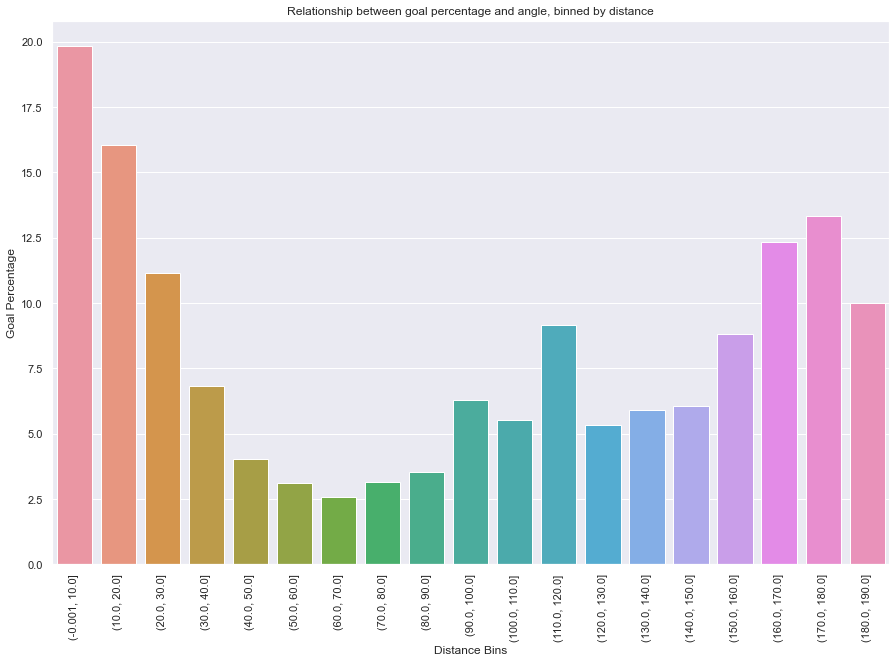

In [26]:
# Q2 - Hist1
plt.figure(figsize=(15, 10))
sns.barplot(data=df_distance, x="Distance Bins", y="Goal Percentage").set_title('Relationship between goal percentage and angle, binned by distance')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '(-0.001, 10.0]'),
  Text(1, 0, '(10.0, 20.0]'),
  Text(2, 0, '(20.0, 30.0]'),
  Text(3, 0, '(30.0, 40.0]'),
  Text(4, 0, '(40.0, 50.0]'),
  Text(5, 0, '(50.0, 60.0]'),
  Text(6, 0, '(60.0, 70.0]'),
  Text(7, 0, '(70.0, 80.0]'),
  Text(8, 0, '(80.0, 90.0]'),
  Text(9, 0, '(90.0, 100.0]'),
  Text(10, 0, '(100.0, 110.0]'),
  Text(11, 0, '(110.0, 120.0]'),
  Text(12, 0, '(120.0, 130.0]'),
  Text(13, 0, '(130.0, 140.0]'),
  Text(14, 0, '(140.0, 150.0]'),
  Text(15, 0, '(150.0, 160.0]'),
  Text(16, 0, '(160.0, 170.0]'),
  Text(17, 0, '(170.0, 180.0]')])

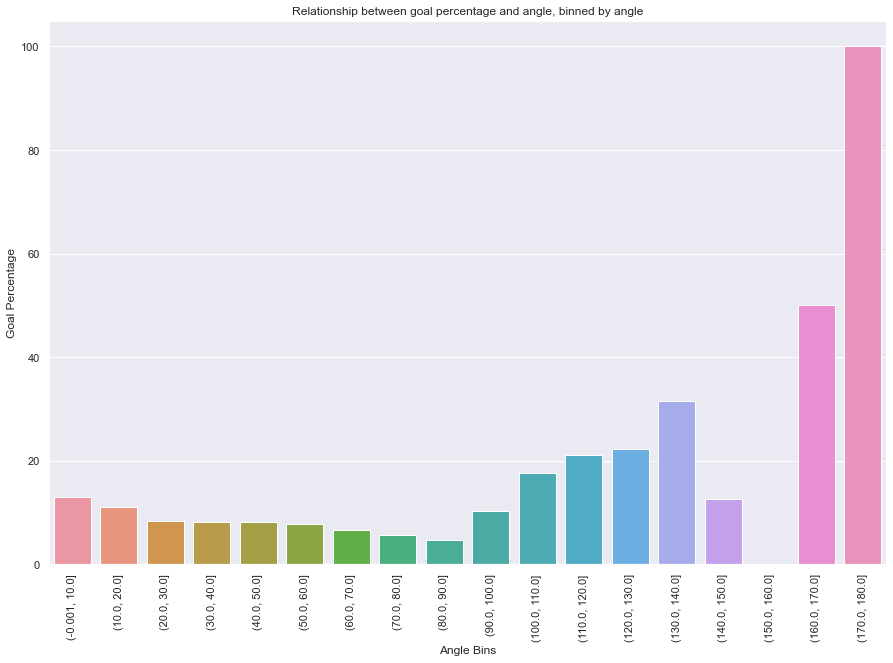

In [27]:
# Q2 - Hist2
plt.figure(figsize=(15, 10))
sns.barplot(data=df_angle, x="Angle Bins", y="Goal Percentage").set_title('Relationship between goal percentage and angle, binned by angle')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Empty Net')

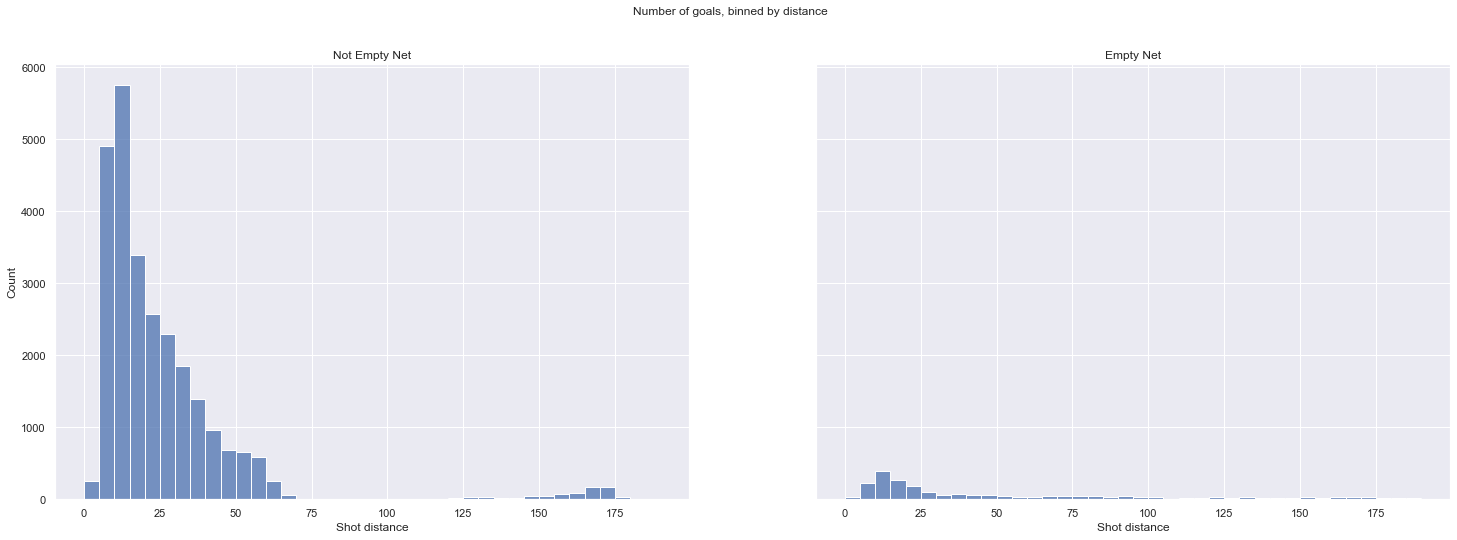

In [28]:
# Q3
df_goals = df[df['Is Goal'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Number of goals, binned by distance')

sns.histplot(ax=axes[0], data=df_goals, x=df_goals[df_goals['Is Empty'] == 0]["Shot distance"], bins=distance_bins)
axes[0].set_title('Not Empty Net')

sns.histplot(ax=axes[1], data=df_goals, x=df_goals[df_goals['Is Empty'] == 1]["Shot distance"], bins=distance_bins)
axes[1].set_title('Empty Net')

In [29]:
# Check for goal in defensive net without empty net
df_goals[(df_goals['Is Empty'] == 0) & (df_goals['st_X'] < -25)]

,Game ID,Event Index,Period,Team,Type,Shot Type,Shooter,Goalie,Strength,X,...,Shot angle,Is Goal,Is Empty,Game seconds,Last event angle,Rebound,Change in Shot Angle,Speed From Previous Event,Angle Bins,Distance Bins
1,2015020001,123,2,Toronto Maple Leafs (TOR),GOAL,Deflected,James van Riemsdyk,Carey Price,Power Play,-73.0,...,-0.353673,1,0,1219,-5.648247,False,0.0,4.374802,"(-0.001, 10.0]","(160.0, 170.0]"
694,2015020013,104,1,New York Rangers (NYR),GOAL,Backhand,Mats Zuccarello,Sergei Bobrovsky,Even,69.0,...,-2.898577,1,0,1156,1.837737,False,0.0,0.785426,"(-0.001, 10.0]","(150.0, 160.0]"
695,2015020013,161,2,Columbus Blue Jackets (CBJ),GOAL,Wrist Shot,Cam Atkinson,Henrik Lundqvist,Even,77.0,...,2.414657,1,0,1859,-15.642246,False,0.0,39.295179,"(-0.001, 10.0]","(160.0, 170.0]"
696,2015020013,280,3,Columbus Blue Jackets (CBJ),GOAL,Snap Shot,Brandon Saad,Henrik Lundqvist,Power Play,-62.0,...,4.543758,1,0,3370,7.926927,False,0.0,1.017213,"(-0.001, 10.0]","(150.0, 160.0]"
697,2015020013,286,3,New York Rangers (NYR),GOAL,Wrist Shot,Oscar Lindberg,Sergei Bobrovsky,Even,72.0,...,3.199540,1,0,3444,11.410983,False,0.0,1.914299,"(-0.001, 10.0]","(160.0, 170.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286248,2018020953,58,1,Philadelphia Flyers (PHI),GOAL,Snap Shot,Sean Couturier,Matt Murray,Even,60.0,...,-7.645013,1,0,726,-45.763898,False,0.0,14.179651,"(-0.001, 10.0]","(150.0, 160.0]"
286249,2018020953,173,2,Pittsburgh Penguins (PIT),GOAL,Wrist Shot,Justin Schultz,Brian Elliott,Even,56.0,...,9.782407,1,0,1801,5.572198,False,0.0,12.776932,"(-0.001, 10.0]","(140.0, 150.0]"
286250,2018020953,275,3,Pittsburgh Penguins (PIT),GOAL,Slap Shot,Evgeni Malkin,Brian Elliott,Even,-50.0,...,0.412193,1,0,2789,-38.107577,False,0.0,10.786938,"(-0.001, 10.0]","(130.0, 140.0]"
286252,2018020953,368,3,Philadelphia Flyers (PHI),GOAL,Wrist Shot,Jakub Voracek,Matt Murray,Even,78.0,...,-12.819094,1,0,3580,-7.926927,False,0.0,6.119187,"(10.0, 20.0]","(170.0, 180.0]"
